In [1]:
import shapely
from shapely.geometry import MultiPoint, Point, Polygon
import shapefile
import pandas as pd
import numpy as np

In [12]:
sf = shapefile.Reader("compiled.dbf",encoding = "ISO8859-1")
shapes = sf.shapes()

In [17]:
fields = sf.fields
fields
print(sf)

shapefile Reader
    32188 shapes (type 'POLYGON')
    32188 records (17 fields)


In [22]:
fields = sf.fields
fields

[('DeletionFlag', 'C', 1, 0),
 ['STATEFP', 'C', 80, 0],
 ['PLACEFP', 'C', 80, 0],
 ['PLACENS', 'C', 80, 0],
 ['GEOID', 'C', 80, 0],
 ['NAME', 'C', 80, 0],
 ['NAMELSAD', 'C', 80, 0],
 ['LSAD', 'C', 80, 0],
 ['CLASSFP', 'C', 80, 0],
 ['PCICBSA', 'C', 80, 0],
 ['PCINECTA', 'C', 80, 0],
 ['MTFCC', 'C', 80, 0],
 ['FUNCSTAT', 'C', 80, 0],
 ['ALAND', 'N', 18, 0],
 ['AWATER', 'N', 18, 0],
 ['INTPTLAT', 'C', 80, 0],
 ['INTPTLON', 'C', 80, 0]]

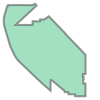

In [23]:
a = shapes[3222].points
a
pol = Polygon(a)
pol

In [24]:
records = sf.records()
records[1][3]

'0151264'

In [2]:
def get_us_border_polygon():
    sf = shapefile.Reader("compiled.dbf",encoding = "ISO8859-1")
    shapes = sf.shapes()
    fields = sf.fields
    records = sf.records()
    county_polygons = {}
    for i, record in enumerate(records):
        county = record[3]  #[3] for 5 digit FIPS CODE of county, while using record[4] indicates the name of county
        points = shapes[i].points
        poly = Polygon(points)
        county_polygons[county] = poly

    return county_polygons

In [2]:
'''def get_us_border_polygon():
    sf = shapefile.Reader("tl_2019_us_county.dbf")
    shapes = sf.shapes()
    fields = sf.fields
    records = sf.records()
    county_polygons = {}
    for i, record in enumerate(records):
        county = record[3]  #[3] for 5 digit FIPS CODE of county, while using record[4] indicates the name of county
        points = shapes[i].points
        poly = Polygon(points)
        county_polygons[county] = poly

    return county_polygons

In [3]:
county_poly = get_us_border_polygon()

In [4]:
def place_code(lat,lon):
    p = Point(lon,lat)
    for county, poly in county_poly.items():
        if poly.contains(p):
            return county
        elif poly.intersects(p):
            return county
    return None

In [5]:
df = pd.read_csv('C:/Users/feihu/Desktop/geo/geo_2021.csv',
                 dtype={"STATE_CODE_001": str}, 
                 low_memory=False).fillna(0)

In [6]:
df1 = df.loc[df['PLACE_CODE_004']!= 0 ]
df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(int)
df1["STATE_CODE_001"] = df1["STATE_CODE_001"].astype(str).apply(lambda x: x.zfill(2))
df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(str).apply(lambda x: x.zfill(5))
df1["PLACE_CODE"] = df1["STATE_CODE_001"] + df1["PLACE_CODE_004"]
df1

<ipython-input-6-0f30126662bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(int)
<ipython-input-6-0f30126662bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["STATE_CODE_001"] = df1["STATE_CODE_001"].astype(str).apply(lambda x: x.zfill(2))
<ipython-input-6-0f30126662bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,STATE_CODE_001,STRUCTURE_NUMBER_008,STATE_CODE_001_STRUCTURE_NUMBER_008_RECORD_TYPE_005A_YEAR_BUILT_027,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,PLACE_CODE
1,01,00000000000S703,1_00000000000S703_1_2002,1,6.0,1.0,4003,0.0,9,53.0,...,8,200.0,2039.0,0.0,Y,62,G,7,133.28,0103004
2,01,0000000000M0022,1_0000000000M0022_1_1942,1,8.0,1.0,0,0.0,0,113.0,...,5,400.0,2041.0,0.0,Y,74,F,5,387.00,0119000
9,01,5,1_000000000000005_1_1900,1,5.0,0.0,0,0.0,10,75.0,...,4,59.0,2032.0,0.0,N,1,P,4,74.40,0148808
15,01,12,1_000000000000012_1_1900,1,4.0,1.0,91,0.0,1,71.0,...,N,500.0,2041.0,0.0,N,1,F,5,250.47,0109328
19,01,24,1_000000000000024_1_1904,1,5.0,1.0,0,0.0,3,117.0,...,6,138.0,2019.0,0.0,N,1,P,2,117.25,0107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730416,78,00000000STX7215,78_00000000STX7215_1_1920,1,4.0,1.0,0,0.0,0,10.0,...,2,360.0,2029.0,0.0,N,78,P,2,91.96,7814029
730417,78,00000000STX7310,78_00000000STX7310_1_2006,1,4.0,1.0,0,0.0,0,10.0,...,6,124.0,2029.0,0.0,N,78,F,6,499.59,7814151
730418,78,0000000STX73205,78_0000000STX73205_1_2006,1,4.0,1.0,0,0.0,0,10.0,...,6,360.0,2029.0,0.0,N,78,F,6,1194.33,7814077
730420,78,00000000STX8001,78_00000000STX8001_1_1990,1,4.0,1.0,0,0.0,0,10.0,...,6,120.0,2029.0,0.0,N,78,F,5,60.72,7814160


In [26]:
df1 = df[df['PLACE_CODE_004']!= 0 ]
#df1.loc['PLACE_CODE_004']= pd.to_numeric(df1['PLACE_CODE_004'],errors='coerce')
df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(int)
df1["STATE_CODE_001"] = df1["STATE_CODE_001"].astype(str).apply(lambda x: x.zfill(2))
df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(str).apply(lambda x: x.zfill(5))
df1.loc["PLACE_CODE"] = df1["STATE_CODE_001"] + df1["PLACE_CODE_004"]
#df1.loc["PLACE_CODE"] = df1["PLACE_CODE"].apply(lambda x: x.zfill(7))
print(df1.shape[0],'intances have place code record.')

<ipython-input-26-916a5be21bd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["PLACE_CODE_004"] = df1["PLACE_CODE_004"].astype(int)
<ipython-input-26-916a5be21bd5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["STATE_CODE_001"] = df1["STATE_CODE_001"].astype(str).apply(lambda x: x.zfill(2))
<ipython-input-26-916a5be21bd5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

384302 intances have place code record.


<ipython-input-26-916a5be21bd5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc["PLACE_CODE"] = df1["STATE_CODE_001"] + df1["PLACE_CODE_004"]


In [7]:
test_df = df1.head(1000)
test_df

,STATE_CODE_001,STRUCTURE_NUMBER_008,STATE_CODE_001_STRUCTURE_NUMBER_008_RECORD_TYPE_005A_YEAR_BUILT_027,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,PLACE_CODE
1,01,00000000000S703,1_00000000000S703_1_2002,1,6.0,1.0,4003,0.0,9,53.0,...,8,200.0,2039.0,0.0,Y,62,G,7,133.28,0103004
2,01,0000000000M0022,1_0000000000M0022_1_1942,1,8.0,1.0,0,0.0,0,113.0,...,5,400.0,2041.0,0.0,Y,74,F,5,387.00,0119000
9,01,5,1_000000000000005_1_1900,1,5.0,0.0,0,0.0,10,75.0,...,4,59.0,2032.0,0.0,N,1,P,4,74.40,0148808
15,01,12,1_000000000000012_1_1900,1,4.0,1.0,91,0.0,1,71.0,...,N,500.0,2041.0,0.0,N,1,F,5,250.47,0109328
19,01,24,1_000000000000024_1_1904,1,5.0,1.0,0,0.0,3,117.0,...,6,138.0,2019.0,0.0,N,1,P,2,117.25,0107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,01,5496,1_000000000005496_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,8,480.0,2030.0,0.0,N,1,G,7,140.25,0190270
3209,01,5497,1_000000000005497_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,8,480.0,2030.0,0.0,N,1,G,7,67.15,0190270
3210,01,5498,1_000000000005498_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,8,480.0,2030.0,0.0,N,1,G,7,56.95,0190270
3211,01,5499,1_000000000005499_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,8,480.0,2030.0,0.0,N,1,G,7,56.95,0190270


In [ ]:
#test_df['PLACE_FIPS'] = test_df[['LAT_016','LONG_017']].apply(place_code)
#test_df['PLACE_FIPS']  =  (test_df['LAT_016'],test_df['LONG_017']).map(lambda x,y: place_code(x,y),axis=1)
#df1['PLACE_FIPS'] = df1.apply(lambda x: place_code(x['LAT_016'],x['LONG_017']),axis=1)
%timeit [place_code(a, b) for a, b in zip(test_df['LAT_016'],test_df['LONG_017'])] 
%timeit test_df.apply(lambda x: place_code(x['LAT_016'],x['LONG_017']),axis=1)

In [9]:
df1['PLACE_FIPS'] = df1.apply(lambda x: place_code(x['LAT_016'],x['LONG_017']),axis=1)

<ipython-input-9-4b10be7b4d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PLACE_FIPS'] = df1.apply(lambda x: place_code(x['LAT_016'],x['LONG_017']),axis=1)


In [10]:
df1

,STATE_CODE_001,STRUCTURE_NUMBER_008,STATE_CODE_001_STRUCTURE_NUMBER_008_RECORD_TYPE_005A_YEAR_BUILT_027,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,...,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,PLACE_CODE,PLACE_FIPS
1,01,00000000000S703,1_00000000000S703_1_2002,1,6.0,1.0,4003,0.0,9,53.0,...,200.0,2039.0,0.0,Y,62,G,7,133.28,0103004,None
2,01,0000000000M0022,1_0000000000M0022_1_1942,1,8.0,1.0,0,0.0,0,113.0,...,400.0,2041.0,0.0,Y,74,F,5,387.00,0119000,None
9,01,5,1_000000000000005_1_1900,1,5.0,0.0,0,0.0,10,75.0,...,59.0,2032.0,0.0,N,1,P,4,74.40,0148808,0148808
15,01,12,1_000000000000012_1_1900,1,4.0,1.0,91,0.0,1,71.0,...,500.0,2041.0,0.0,N,1,F,5,250.47,0109328,None
19,01,24,1_000000000000024_1_1904,1,5.0,1.0,0,0.0,3,117.0,...,138.0,2019.0,0.0,N,1,P,2,117.25,0107000,0107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,01,5496,1_000000000005496_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,480.0,2030.0,0.0,N,1,G,7,140.25,0190270,None
3209,01,5497,1_000000000005497_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,480.0,2030.0,0.0,N,1,G,7,67.15,0190270,None
3210,01,5498,1_000000000005498_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,480.0,2030.0,0.0,N,1,G,7,56.95,0190270,None
3211,01,5499,1_000000000005499_1_1956,1,4.0,0.0,17,0.0,6,85.0,...,480.0,2030.0,0.0,N,1,G,7,56.95,0190270,None


In [13]:
df1.to_csv('C:/Users/feihu/Desktop/result/place/placecode/2021.csv', index=False)

In [14]:
df2 = df1.dropna(axis=0, subset=['PLACE_FIPS'])
print(df2.shape[0],'intances have a valid place code return.')
df2['compare'] = np.where(df2['PLACE_FIPS'] == df2['PLACE_CODE'], True , False)
print(df2['compare'].sum(),'have same place code')
print(df2.shape[0]-df2['compare'].sum(),'not have diff place code')

383724 intances have a valid place code return.
0 have same place code
383724 not have diff place code


<ipython-input-14-2cad3efeae3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compare'] = np.where(df2['PLACE_FIPS'] == df2['PLACE_CODE'], True , False)


In [ ]:
df2.to_csv('C:/Users/feihu/Desktop/result/place/result/2021_reslut.csv', index=False)